# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


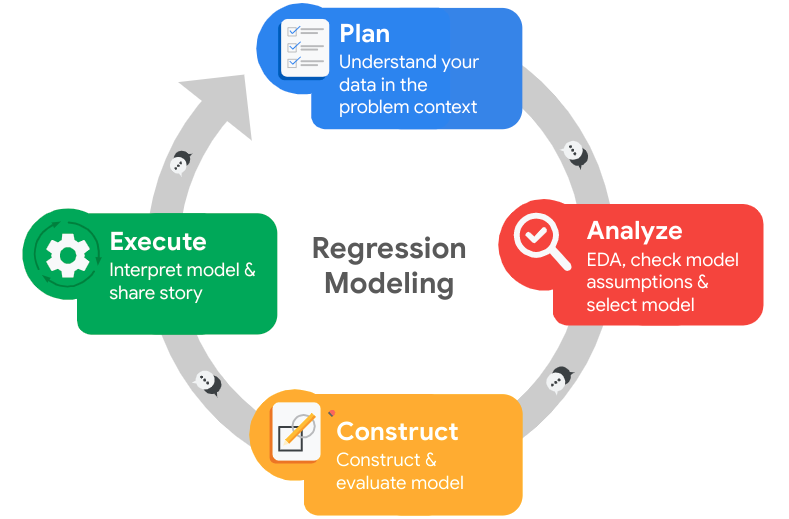

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* The stakeholder is the senior leadership team at Salifort Motors, a fictional French-based alternative energy vehicle manufacturer.
* The goal of the project is to increase employee retention by analyzing data and designing a model that predicts whether an employee will leave the company based on their  department, number of projects, average monthly hours, and any other data.
* The number of observations is 14,999 in 10 columns. In addition to the binary values in a column named "left" there is also a satisfaction column with continuous values from 0 to 1. The salary information is presented as categorical data with values low, medium and high. There is no missing data. Looks like the data set does not require too much preprocessing. I hesitate to remove 20% of the data as duplication. Since there are no unique IDs, It seems possible to have different employees with the same results.
* I am using my knowledge and notes on basic pandas functions.
* I don't have ethical concerns so far. It does sounds intuitive that retaining employees cost money. I wonder how if somebody will do a cost-benefit analysis for retainging employees. 


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")
df_orig = df0

# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={"number_project": "projects", "average_montly_hours": "monthly_hours", 'time_spend_company': 'tenure', 
                   'Work_accident': 'accident', 'Department': 'department'})


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'projects', 'monthly_hours',
       'tenure', 'accident', 'left', 'promotion_last_5years', 'department',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values

df0.isnull().sum(axis=0)


satisfaction_level       0
last_evaluation          0
projects                 0
monthly_hours            0
tenure                   0
accident                 0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,projects,monthly_hours,tenure,accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]


,satisfaction_level,last_evaluation,projects,monthly_hours,tenure,accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed

#In my opinion duplicates are not problems. Different employees can have the same informations 
#Removing 20% of data as duplicate is a series step
# will come back to this later if issues arise
#df0.drop_duplicates(inplace=True)


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
#df0.head()

### Check outliers

Check for outliers in the data.

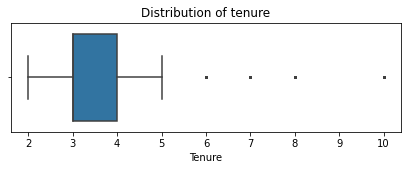

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(7,2))
sns.boxplot(x='tenure', fliersize=1, data=df0);
plt.xlabel('Tenure')
plt.title('Distribution of tenure');


In [12]:
# Determine the number of rows containing outliers
#df0[df0['tenure']>5.5]
print(len(df0[df0['tenure']>5]))
df0=df0[df0['tenure']<6]


1282


In [13]:
df_orig[df_orig['time_spend_company']==8]['left'].value_counts()

0    162
Name: left, dtype: int64

In [14]:
df_orig['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
print(df0['left'].value_counts())

# Get percentages of people who left vs. stayed
df0['left'].value_counts(normalize=True)*100

print(df0['department'].value_counts())

0    10355
1     3362
Name: left, dtype: int64
sales          3739
technical      2540
support        2082
IT             1137
product_mng     827
marketing       765
RandD           735
accounting      712
hr              692
management      488
Name: department, dtype: int64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

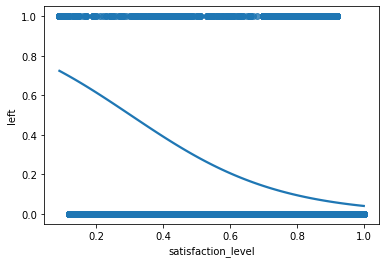

In [16]:
# Create a plot as needed
#sns.pairplot(df0)

sns.regplot(x="satisfaction_level", y="left", data=df0, logistic=True, ci=None)



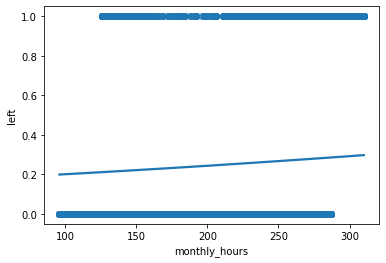

In [17]:
# Create a plot as needed
sns.regplot(x="monthly_hours", y="left", data=df0, logistic=True, ci=None)


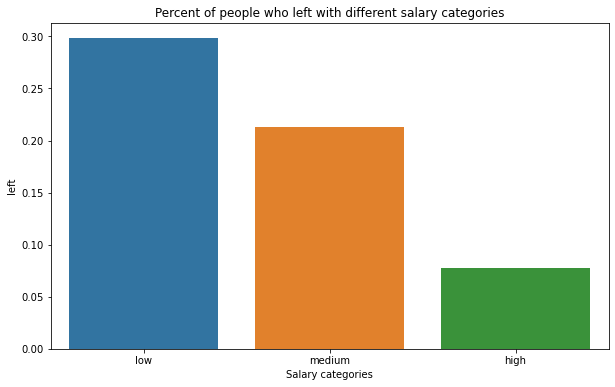

In [18]:
# Create a plot as needed
#print(df0['salary'].value_counts())

plt.figure(figsize=(10,6))
sns.barplot(x=df0["salary"], y=df0["left"], ci=False)
plt.title("Percent of people who left with different salary categories")
plt.xlabel("Salary categories")
plt.show()


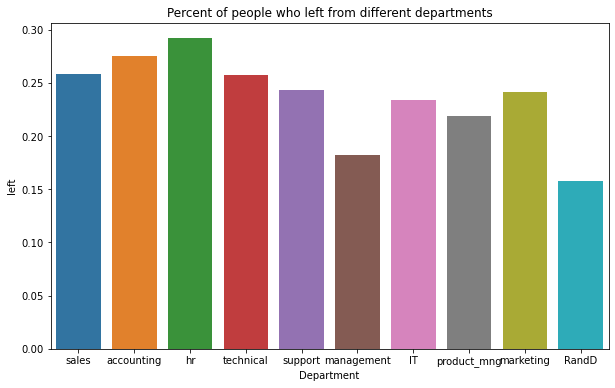

In [19]:
# Create a plot as needed
plt.figure(figsize=(10,6))
sns.barplot(x=df0["department"], y=df0["left"], ci=False)
plt.title("Percent of people who left from different departments")
plt.xlabel("Department")
plt.show()


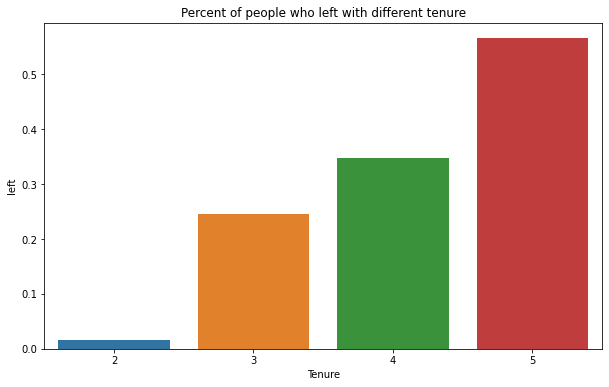

In [20]:
# Create a plot as needed
plt.figure(figsize=(10,6))
sns.barplot(x=df0["tenure"], y=df0["left"], ci=False)
plt.title("Percent of people who left with different tenure")
plt.xlabel("Tenure")
plt.show()

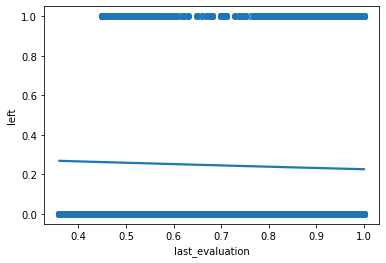

In [21]:
# Create a plot as needed
sns.regplot(x="last_evaluation", y="left", data=df0, logistic=True, ci=None)


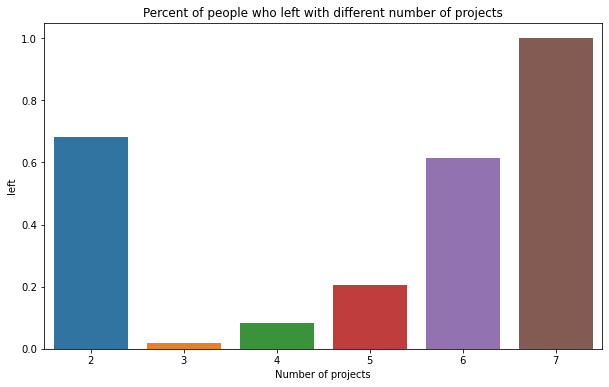

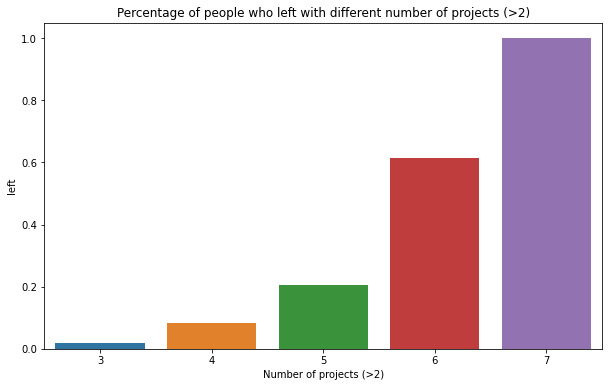

In [22]:
# Create a plot as needed
plt.figure(figsize=(10,6))
sns.barplot(x=df0["projects"], y=df0["left"], ci=False)
plt.title("Percent of people who left with different number of projects")
plt.xlabel("Number of projects")
plt.show()

# Having 2 projects is a special case, more than half of people with two projects leave.
# remove
df0=df0[df0['projects']>2]
plt.figure(figsize=(10,6))
sns.barplot(x=df0["projects"], y=df0["left"], ci=False)
plt.title("Percentage of people who left with different number of projects (>2)")
plt.xlabel("Number of projects (>2)")
plt.show()


In [23]:
df0[df0['projects']==7]["left"].value_counts()

1    256
Name: left, dtype: int64

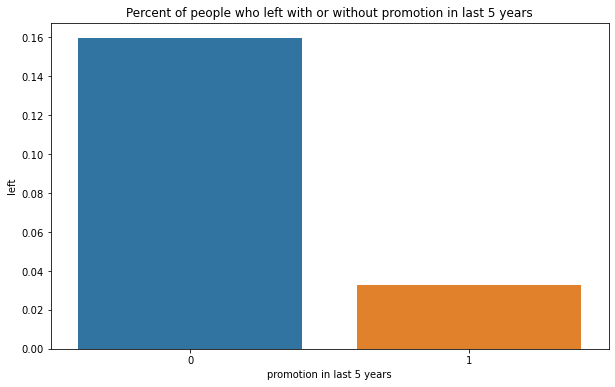

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=df0["promotion_last_5years"], y=df0["left"], ci=False)
plt.title("Percent of people who left with or without promotion in last 5 years")
plt.xlabel("promotion in last 5 years")
plt.show()

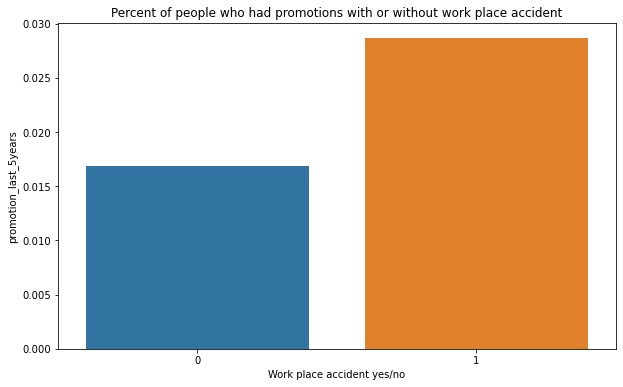

In [25]:
# Create a plot as needed
plt.figure(figsize=(10,6))
sns.barplot(x=df0["accident"], y=df0["promotion_last_5years"], ci=False)
plt.title("Percent of people who had promotions with or without work place accident")
plt.xlabel("Work place accident yes/no")
plt.show()


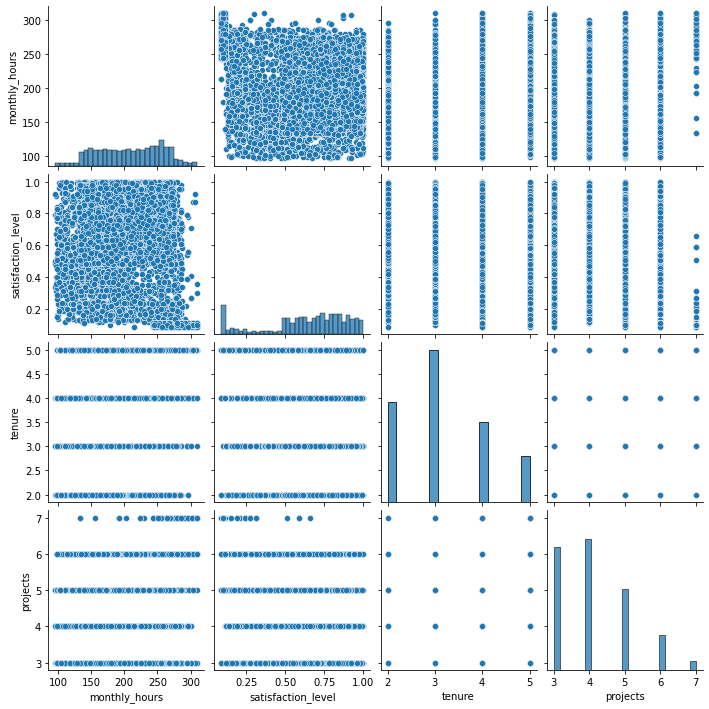

In [26]:
sns.pairplot(df0, x_vars=['monthly_hours', 'satisfaction_level', 'tenure', 'projects'], 
             y_vars=['monthly_hours', 'satisfaction_level', 'tenure', 'projects'])

### Insights

* The plots show several obvious relations between the different variables and whether people left or not.
    * Satisfaction level seems to be inverse proportional to whether or not people left.
    * The more average monthly hour people work the more likely that they left.
    * The lower the salary the more people left.
    * 5 year tenure seems to be critical length. Until 5 year more people leave the more years they spend at the company. After 6 year hardly anybody leaves. This might be related to promotion.
    * Hardly any person with 3 project left. From people with more than 3 projects the more projects they have the more of them left, with all people leaving having 7 projects. About 65% of people with 2 projects left, more than the about 60% of people who left with 6 projects. Having 2 projects seems to have worse effect than having 6 projects.
    * 25% of people left who did not get a promotion during the last 5 years, 5 times more than people who received promotion during the last 5 years. 
    * The workplace accindent has similar relation with people leaving as  promotion, which is strange. 
    * When the last evaluation was does not seem to have a relation whether or not somebody left.
    * There is no large difference between departments.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We want to predict the binary values left=1, did not leave=0 using several variables.

### Identify the types of models most appropriate for this task.

* binomial logistic regression 
* decision tree
* random forests
* adaptive boosting
* gradient boosting.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [27]:
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df1 = df0.copy()
salary_dict = {'low': 0, 'medium': 2, 'high': 2    }
df1['salary'] = df1['salary'].replace(salary_dict).astype(float)
df1 = df1.drop(columns=['last_evaluation', 'accident', 'department'])

df1 = df1.astype({"projects": float, "monthly_hours": float, "tenure": float, "promotion_last_5years": float})

# left                   14999 non-null  int64  

# satisfaction_level     14999 non-null  float64
# projects               14999 non-null  int64  
# monthly_hours          14999 non-null  int64  
# tenure                 14999 non-null  int64  
# promotion_last_5years  14999 non-null  int64  
# salary                 14999 non-null  int64
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11420 entries, 2 to 14997
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11420 non-null  float64
 1   projects               11420 non-null  float64
 2   monthly_hours          11420 non-null  float64
 3   tenure                 11420 non-null  float64
 4   left                   11420 non-null  int64  
 5   promotion_last_5years  11420 non-null  float64
 6   salary                 11420 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 971.8 KB


In [28]:
y = df1[["left"]]
X = df1.drop(columns=['left'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11420 entries, 2 to 14997
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11420 non-null  float64
 1   projects               11420 non-null  float64
 2   monthly_hours          11420 non-null  float64
 3   tenure                 11420 non-null  float64
 4   promotion_last_5years  11420 non-null  float64
 5   salary                 11420 non-null  float64
dtypes: float64(6)
memory usage: 882.6 KB
None


,satisfaction_level,projects,monthly_hours,tenure,promotion_last_5years,salary
2,0.11,7.0,272.0,4.0,0.0,2.0
3,0.72,5.0,223.0,5.0,0.0,0.0
6,0.10,6.0,247.0,4.0,0.0,0.0
7,0.92,5.0,259.0,5.0,0.0,0.0
8,0.89,5.0,224.0,5.0,0.0,0.0


In [29]:
clf = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [30]:
# w/ duplicates and w/outliers
# array([[-4.07809766, -0.26256328,  0.00512495,  0.2248893 , -1.23272101,        -0.33694424]])
#w/o duplicates
# array([[-3.74365142, -0.23098957,  0.00459159,  0.2744351 , -1.25953274, -0.29509739]])
# w/o duplicates and w/o outliers
#array([[-3.57605987, -0.30407498,  0.00450566,  0.5950493 , -1.096729  ,       -0.28768104]])
# 2 projects and 5+ tenure removed 
# array([[-0.98921666,  0.78766056,  0.02079523,  1.39368706, -0.80930465, -0.24060682]])
#  2 projects and 5+ tenure removed, duplicates left in
# array([[-1.03071263,  0.74481553,  0.0220389 ,  1.52294328, -1.11647876,  -0.28849723]])
clf.coef_

array([[-1.03071263,  0.74481553,  0.0220389 ,  1.52294328, -1.11647876,
        -0.28849723]])

In [31]:
print("change in turnover rate")

print("satisfaction_level  projects  monthly_hours  tenure  promotion_last_5years Salary")

np.round((np.exp(clf.coef_)-1)*100,2)

change in turnover rate
satisfaction_level  projects  monthly_hours  tenure  promotion_last_5years Salary


array([[-64.32, 110.61,   2.23, 358.57, -67.26, -25.06]])

In [32]:
# w/ duplicates
# array([0.58529875])
# w/0 duplicates
# array([-0.26242742])
# w/o duplicates and w/o outliers
# array([-1.12536938])
# 2 projects and 5+ tenure removed
#array([-14.75906601])

clf.intercept_

array([-14.89895067])

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [33]:
y_pred = clf.predict(X_test)

In [34]:
import sklearn.metrics as metrics

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))
print("AUC Score:", "%.6f" % metrics.roc_auc_score(y_test, y_pred))
# with duplicates
#Accuracy: 0.764444
#Precision: 0.511364
#Recall: 0.251866
#F1 Score: 0.337500

# w/o duplicates
# Accuracy: 0.828794
# Precision: 0.464481
# Recall: 0.140962
# F1 Score: 0.216285

# w/o duplicates and w/o outliers
# Accuracy: 0.812696
# Precision: 0.372294
# Recall: 0.143573
# F1 Score: 0.207229

# duplicates, 2 projects and 5+ tenure removed
#Accuracy: 0.945442
#Precision: 0.811765
#Recall: 0.652997
#F1 Score: 0.723776
#AUC Score: 0.817192

#  2 projects and 5+ tenure removed, duplicates left in
# Accuracy: 0.945417
#Precision: 0.844660
#Recall: 0.802583
#F1 Score: 0.823084
#AUC Score: 0.887422

Accuracy: 0.945417
Precision: 0.844660
Recall: 0.802583
F1 Score: 0.823084
AUC Score: 0.887422


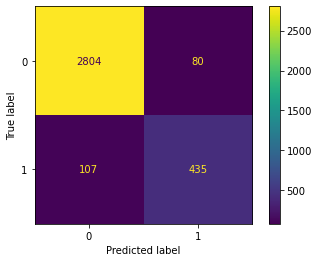

In [35]:
# Construct and display your confusion matrix.
# Construct the confusion matrix for your predicted and test values.

cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the visual in-line.
disp.plot(values_format='')


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



* Key insights: Employees leave because thet are overworked without adequate compensation, most likely they are burned out.
* Business recommendations: In order to increase retention consider balancing the work (number of hours worked, number of projects assigned to a person) with compensation (salary and promotion) for at least 5 years.
* Investigate how satisfaction of employees can be increased without spening too much on them.
* It would be difficult to improve the model with the given dataset. The performance metrics of the logistic regression model is quite good. Will try random forest model too.
* There is something special about employees having two projects only, as unusually large portion of them (70%) leaves the company.
* Used: notes about logistic regression.
* Ethical considerations: All solutions will cost money to the company. The company leadership will have to decide which costs more, to let employees leave or to improve work conditions and compensations.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

* The beta coefficients are 
    * Satisfaction_level: -1.03071263 -> exp -> 0.36 -> 6.4% decrease in employee turnover rate for every 1/10th of satisfaction level increase.
    * Projects: 0.74481553 -> exp -> 2.11 > 111% increase in employee turnover rate for every additional project. With 7 projects 100% left. 2 projects is an exception from this trend with 70% leaving. 
    * Monthly_hours: 0.0220389 -> exp -> 1.022 -> 2.2% increase in employees turnover rate for every additional hour worked
    * Tenure 1.52294328 -> exp -> 4.59 -> 359% increase in employee turnover rate for every additional year (decreases for year 6, nobody leaves after that) 
    * Promotion_last_5years: -1.11647876 -> 0.33 -> 67% decrease in employee turnover rate if the employee was promoted
    * Salary: -0.28849723 -> exp -> 0.75 -> 25% decrease in employee turnover rate for increasing salary from low to mid or from mid to high.
* Model performance is quite good:
    * Accuracy: 0.945417
    * Precision: 0.844660
    * Recall: 0.802583
    * F1 Score: 0.823084
    * AUC Score: 0.887422
    * false negatives are higher than false positives, which is expected with the data having bias (23% left vs. 77% stayed)

### Conclusion, Recommendations, Next Steps

* The data analysis with binomial logisitic regression model shows with good performance how different parameters affect the retention of employees at the company.
* The company should try to balance workload and work compensation to increase retention. The new approach could be tested in the departments with the highest turnover rates: HR and Accounting.
* XGBoost model will be tried below. 

In [36]:
# Define xgb as XGBClassifier.
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Define parameters for tuning.
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

# Define your criteria as `scoring`.
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Construct GridSearch.
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1',
                      n_jobs = -1, 
                      verbose = 1
                     )

In [37]:
%%time
# fit the GridSearch model to training data

xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   25.3s finished


CPU times: user 1min 2s, sys: 0 ns, total: 1min 2s
Wall time: 55.8 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0

In [38]:
# Apply the model to predict on the test data. 
y_pred_xgb = xgb_cv.predict(X_test)

In [39]:
# 1. Print your accuracy score.
ac_score = metrics.accuracy_score(y_test, y_pred_xgb)
print('accuracy score:', ac_score)

# 2. Print your precision score.
pc_score = metrics.precision_score(y_test, y_pred_xgb)
print('precision score:', pc_score)

# 3. Print your recall score.
rc_score = metrics.recall_score(y_test, y_pred_xgb)
print('recall score:', rc_score)

# 4. Print your f1 score.
f1_score = metrics.f1_score(y_test, y_pred_xgb)
print('f1 score:', f1_score)

print("AUC Score:", "%.6f" % metrics.roc_auc_score(y_test, y_pred_xgb))


accuracy score: 0.974314068884997
precision score: 0.9558232931726908
recall score: 0.8782287822878229
f1 score: 0.9153846153846154
AUC Score: 0.935300


In [40]:

#table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest", "Tuned XGBoost"],
#                      'F1': [0.945422, 0.947306, f1_score],
#                      'Recall': [0.935863, 0.944501, rc_score],
#                      'Precision': [0.955197, 0.950128, pc_score],
#                      'Accuracy': [0.940864, 0.942450, ac_score]
#                     }
#                    )
#table

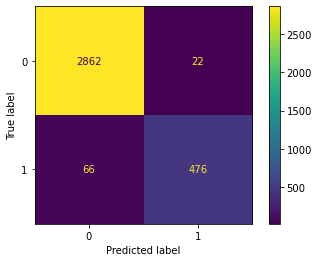

In [41]:
# Construct and display your confusion matrix.
cm_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)

# Create the display for your confusion matrix.
disp_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_cv.classes_)
# Plot the visual in-line.
disp_xgb.plot(values_format='')


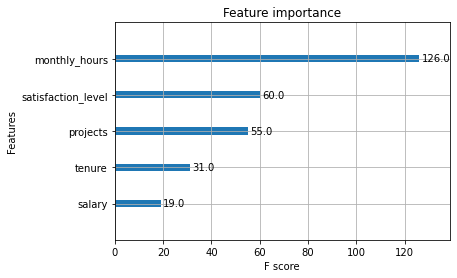

In [42]:
# Plot the relative feature importance of the predictor variables in the model.
plot_importance(xgb_cv.best_estimator_)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.